In [1]:
import sympy as sp
import numpy as np
from sympy import I 
import matplotlib.pyplot as plt
import math


In [2]:
b, s, p3 = sp.symbols('b s p3')
b_values = np.arange(-5, 8, 0.025)
print(b_values)

[-5.00000000e+00 -4.97500000e+00 -4.95000000e+00 -4.92500000e+00
 -4.90000000e+00 -4.87500000e+00 -4.85000000e+00 -4.82500000e+00
 -4.80000000e+00 -4.77500000e+00 -4.75000000e+00 -4.72500000e+00
 -4.70000000e+00 -4.67500000e+00 -4.65000000e+00 -4.62500000e+00
 -4.60000000e+00 -4.57500000e+00 -4.55000000e+00 -4.52500000e+00
 -4.50000000e+00 -4.47500000e+00 -4.45000000e+00 -4.42500000e+00
 -4.40000000e+00 -4.37500000e+00 -4.35000000e+00 -4.32500000e+00
 -4.30000000e+00 -4.27500000e+00 -4.25000000e+00 -4.22500000e+00
 -4.20000000e+00 -4.17500000e+00 -4.15000000e+00 -4.12500000e+00
 -4.10000000e+00 -4.07500000e+00 -4.05000000e+00 -4.02500000e+00
 -4.00000000e+00 -3.97500000e+00 -3.95000000e+00 -3.92500000e+00
 -3.90000000e+00 -3.87500000e+00 -3.85000000e+00 -3.82500000e+00
 -3.80000000e+00 -3.77500000e+00 -3.75000000e+00 -3.72500000e+00
 -3.70000000e+00 -3.67500000e+00 -3.65000000e+00 -3.62500000e+00
 -3.60000000e+00 -3.57500000e+00 -3.55000000e+00 -3.52500000e+00
 -3.50000000e+00 -3.47500

In [3]:
polynom = -13*p3**4 + (30 + 6*b)*p3**3 - (21 + 6*b + b**2 + 3*s)*p3**2 + (4 + b*s + 3*s)*p3 - s**2/4
sturm_sequence = sp.polys.polytools.sturm(polynom, p3)

print("Последний многочлен системы Штурма:")

equation1 = sturm_sequence[-1].factor()
print(equation1)

Последний многочлен системы Штурма:
(-2*b + s)**3*(-b**2 - 114*b + 78*s - 129)**2*(b**4*s + 12*b**3*s + 2*b**3 - 12*b**2*s**2 + 84*b**2*s + 18*b**2 - 120*b*s**2 + 180*b*s + 108*b + 52*s**3 - 144*s**2 + 54)/(2704*(-2*b**6 - 18*b**5 + 24*b**4*s - 108*b**4 + 183*b**3*s - 102*b**3 - 109*b**2*s**2 + 45*b**2*s - 96*b**2 - 24*b*s**2 + 441*b*s + 144*b + 78*s**3 - 372*s**2 + 63*s + 162)**2)


In [4]:
f1 = -2*b + s
f2 = b**4*s + 12*b**3*s + 2*b**3 - 12*b**2*s**2 + 84*b**2*s + 18*b**2 - 120*b*s**2 + 180*b*s + 108*b + 52*s**3 - 144*s**2 + 54
p = sp.solve(f2.subs(s, 0), b)
for elem in p:
    print(elem)
print(-3 - 3/(3/2 + math.sqrt(13)/2)**(1/3) + 3*(3/2 + math.sqrt(13)/2)**(1/3))

-3 + 3*(-1/2 - sqrt(3)*I/2)*(3/2 + sqrt(13)/2)**(1/3) - 3/((-1/2 - sqrt(3)*I/2)*(3/2 + sqrt(13)/2)**(1/3))
-3 - 3/((-1/2 + sqrt(3)*I/2)*(3/2 + sqrt(13)/2)**(1/3)) + 3*(-1/2 + sqrt(3)*I/2)*(3/2 + sqrt(13)/2)**(1/3)
-3 - 3/(3/2 + sqrt(13)/2)**(1/3) + 3*(3/2 + sqrt(13)/2)**(1/3)
-0.5468049783395292


In [5]:
sol_1 = []
eps = 10**(-7)


for b_val in b_values:
    solution1 = sp.solve(f1.subs(b, b_val), s)
    p = [sol.evalf() for sol in solution1]
    real_solutions_prob = []
    for sol in p:
        if (abs(sol-abs(sol))<eps):
            real_solutions_prob.append((abs(sol)))
        elif (abs(sol+abs(sol))<eps):
            real_solutions_prob.append(-(abs(sol)))
        else:
            real_solutions_prob.append((sol))
    
    real_solutions1 = [sol.evalf() for sol in real_solutions_prob if sol.is_real]

    for elem in real_solutions1:
        sol_1.append((b_val, elem))
        # if b_val <= - 5 and b_val <= elem and elem < 1:
        #     sol_1.append((b_val, elem))
        # elif -5 <= b_val and b_val <= -1 and b_val <= elem and elem < 1 + (5 + b_val)**2/24:
        #     sol_1.append((b_val, elem))
        # elif -1 <= b_val and b_val <= 7 and -1 < elem and elem < 1 + (5 + b_val)**2/24:
        #     sol_1.append((b_val, elem))
        # elif b_val > 7 and -1 < elem and elem <= b_val:
        #     sol_1.append((b_val, elem))
for elem in sol_1:
    print(elem)

(np.float64(-5.0), -10.0000000000000)
(np.float64(-4.975), -9.95000000000000)
(np.float64(-4.949999999999999), -9.90000000000000)
(np.float64(-4.924999999999999), -9.85000000000000)
(np.float64(-4.899999999999999), -9.80000000000000)
(np.float64(-4.874999999999998), -9.75000000000000)
(np.float64(-4.849999999999998), -9.70000000000000)
(np.float64(-4.8249999999999975), -9.65000000000000)
(np.float64(-4.799999999999997), -9.60000000000000)
(np.float64(-4.774999999999997), -9.54999999999999)
(np.float64(-4.7499999999999964), -9.50000000000000)
(np.float64(-4.724999999999996), -9.45000000000000)
(np.float64(-4.699999999999996), -9.40000000000000)
(np.float64(-4.674999999999995), -9.34999999999999)
(np.float64(-4.649999999999995), -9.30000000000000)
(np.float64(-4.624999999999995), -9.25000000000000)
(np.float64(-4.599999999999994), -9.20000000000000)
(np.float64(-4.574999999999994), -9.14999999999999)
(np.float64(-4.549999999999994), -9.10000000000000)
(np.float64(-4.524999999999993), -9.

In [6]:
sol_2 = []
eps = 10**(-7)


for b_val in b_values:
    solution2 = sp.solve(f2.subs(b, b_val), s)
    p = [sol.evalf() for sol in solution2]
    real_solutions_prob = []
    for sol in p:
        if (abs(sol-abs(sol))<eps):
            real_solutions_prob.append((abs(sol)))
        elif (abs(sol+abs(sol))<eps):
            real_solutions_prob.append(-(abs(sol)))
        else:
            real_solutions_prob.append((sol))
    
    real_solutions2 = [sol.evalf() for sol in real_solutions_prob if sol.is_real]

    for elem in real_solutions2:
        sol_2.append((b_val, elem))
        # if b_val <= - 5 and b_val <= elem and elem < 1:
        #     sol_2.append((b_val, elem))
        # elif -5 <= b_val and b_val <= -1 and b_val <= elem and elem < 1 + (5 + b_val)**2/24:
        #     sol_2.append((b_val, elem))
        # elif -1 <= b_val and b_val <= 7 and -1 < elem and elem < 1 + (5 + b_val)**2/24:
        #     sol_2.append((b_val, elem))
        # elif b_val > 7 and -1 < elem and elem <= b_val:
        #     sol_2.append((b_val, elem))
for elem in sol_2:
    print(elem)

(np.float64(-5.0), 0.640799806711820)
(np.float64(-4.975), 0.644577494412366)
(np.float64(-4.949999999999999), 0.648388706991745)
(np.float64(-4.924999999999999), 0.652233766502610)
(np.float64(-4.899999999999999), 0.656112997470713)
(np.float64(-4.874999999999998), 0.660026726894599)
(np.float64(-4.849999999999998), 0.663975284244817)
(np.float64(-4.8249999999999975), 0.667959001462744)
(np.float64(-4.799999999999997), 0.671978212958927)
(np.float64(-4.774999999999997), 0.676033255611017)
(np.float64(-4.7499999999999964), 0.680124468761224)
(np.float64(-4.724999999999996), 0.684252194213353)
(np.float64(-4.699999999999996), 0.688416776229382)
(np.float64(-4.674999999999995), 0.692618561525579)
(np.float64(-4.649999999999995), 0.696857899268186)
(np.float64(-4.624999999999995), 0.701135141068633)
(np.float64(-4.599999999999994), 0.705450640978315)
(np.float64(-4.574999999999994), 0.709804755482901)
(np.float64(-4.549999999999994), 0.714197843496205)
(np.float64(-4.524999999999993), 0.7

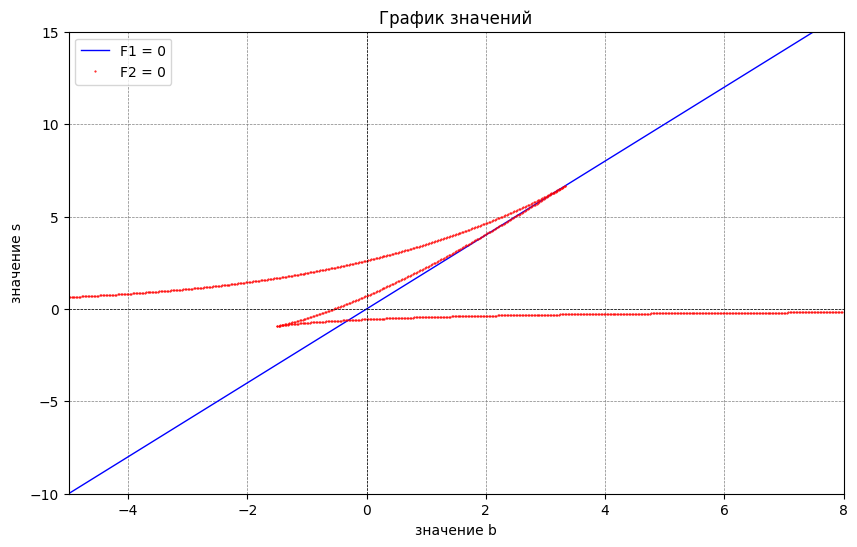

In [7]:
x1, y1 = zip(*sol_1)  # Распаковываем кортежи в два списка для первого графика
x2, y2 = zip(*sol_2)  # Распаковываем кортежи в два списка для второго графика

plt.figure(figsize=(10, 6))

# Первый график
plt.plot(x1, y1, linestyle='-', color='b', label='F1 = 0', linewidth=1)  # Линия без точек

# Второй график
# plt.plot(x2, y2, linestyle='None', color='r', label='F2', markersize =2, linewidth=1) 
#  
plt.plot(x2, y2, 'r.',label='F2 = 0', markersize=1)  

# Настройки графика
plt.title('График значений')
plt.xlabel('значение b')
plt.ylabel('значение s')
plt.axhline(0, color='black', linewidth=0.5, ls='--')
plt.axvline(0, color='black', linewidth=0.5, ls='--')
plt.grid(color='gray', linestyle='--', linewidth=0.5)

# Установка границ осей
plt.xlim(-5, 8)  # Установка границ по оси X
plt.ylim(-10, 15)  # Установка границ по оси Y

plt.legend()
plt.show()